# 데이터 출처

# 필요한 라이브러리 로드

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 데이터셋 로드

In [5]:
df = pd.read_csv("data/diabetes_feature.csv")
df.shape

(768, 16)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


# 학습과 예측에 사용할 데이터셋 만들기

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [9]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [10]:
y = df["Outcome"]
y.shape

(768,)

In [11]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split으로 만듭니다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_train.shape, y_train.shape

((614, 9), (614,))

In [16]:
# test 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_test.shape, y_test.shape

((154, 9), (154,))

# 학습과 예측하기

In [49]:
# Decision Tree 를 불러옵니다.

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model

DecisionTreeClassifier(random_state=42)

## 최적의 max_depth 값 찾기

In [65]:
for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) *100
    
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


In [50]:
# 학습을 시킵니다

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
feature_names = X_train.columns.tolist()

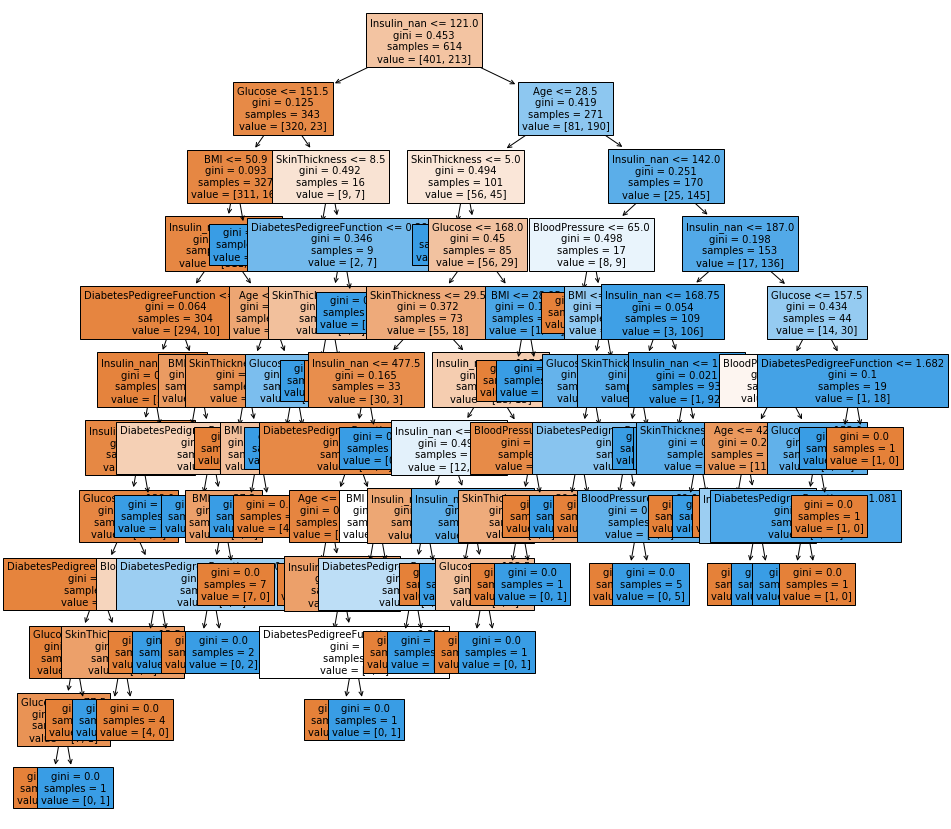

In [61]:
from sklearn.tree import plot_tree

plt.figure(figsize = (15, 15))
tree = plot_tree(model, feature_names = feature_names,fontsize = 10, filled = True)

In [51]:
# 예측을 하고 결과를 y_predict에 담습니다.

y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

## GridSearch

In [71]:
from sklearn.model_selection import GridSearchCV


model = DecisionTreeClassifier(random_state = 42)
param_grid = {"max_depth" : range(3, 12),
             "max_features" : [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid = param_grid, n_jobs = -1, cv = 5, verbose = 2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 210 out of 225 | elapsed:    9.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    9.0s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [72]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [73]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

In [74]:
clf.best_score_

0.8664934026389444

In [78]:
pd.DataFrame(clf.cv_results_).sort_values(by = "rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.014493,0.001102,0.007536,0.002866,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.012987,0.002677,0.007135,0.001677,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.016460,0.001505,0.006798,0.001576,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.015338,0.001771,0.007530,0.001230,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
27,0.013244,0.001206,0.007973,0.002142,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5


In [79]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [80]:
clf.score(X_test, y_test)

0.8701298701298701

## Random Search

In [95]:
model?

In [118]:
max_depth = np.random.randint(3, 20, 10)
max_depth

array([17, 10, 13, 18, 18, 15, 12, 12, 18, 13])

In [119]:

max_features = np.random.uniform(0.7, 1.0, 100)

In [126]:
param_distributions = {"max_depth" : max_depth,
                      "max_features": max_features,
                       "min_samples_split" : list(range(2, 7))
                      }
param_distributions

{'max_depth': array([17, 10, 13, 18, 18, 15, 12, 12, 18, 13]),
 'max_features': array([0.81067464, 0.87598676, 0.83468647, 0.7205768 , 0.83555595,
        0.87222734, 0.77458998, 0.99044847, 0.91103543, 0.97038133,
        0.77917175, 0.96146973, 0.78398253, 0.85129178, 0.90761042,
        0.92774561, 0.79227297, 0.9090295 , 0.89821163, 0.99887157,
        0.83812278, 0.98507141, 0.93765782, 0.71984367, 0.84939767,
        0.81150878, 0.8855398 , 0.80316165, 0.75009095, 0.88965645,
        0.964156  , 0.96822636, 0.71587896, 0.73701517, 0.9609951 ,
        0.79998488, 0.86344426, 0.77613563, 0.72276997, 0.94468082,
        0.97163122, 0.9347221 , 0.74576254, 0.93399705, 0.84282889,
        0.89641932, 0.86193698, 0.80892489, 0.72768463, 0.87144883,
        0.9892525 , 0.99655432, 0.77127303, 0.77399559, 0.73241791,
        0.9576472 , 0.90529723, 0.82218036, 0.83937845, 0.86364367,
        0.74043731, 0.92854004, 0.98641066, 0.72177111, 0.87367161,
        0.82936985, 0.98352916, 0.778

In [127]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
                  param_distributions,
                  n_iter = 1000,
                  scoring = "accuracy",
                  n_jobs = -1,
                  cv = 5,
                  random_state = 42)

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([17, 10, 13, 18, 18, 15, 12, 12, 18, 13]),
                                        'max_features': array([0.81067464, 0.87598676, 0.83468647, 0.7205768 , 0.83555595,
       0.87222734, 0.77458998, 0.99044847, 0.91103543, 0.97038133,
       0.77917175, 0.96146973, 0.78398253, 0.85129178, 0.90761...
       0.84194903, 0.94748929, 0.93066738, 0.73526891, 0.77417995,
       0.94495348, 0.95119505, 0.79982508, 0.94858362, 0.72651008,
       0.79150342, 0.97168069, 0.82796674, 0.75830304, 0.79398653,
       0.97022957, 0.93905743, 0.92060137, 0.92256542, 0.95042648,
       0.81420306, 0.95703771, 0.7977568 , 0.89309236, 0.8769454 ,
       0.79565416, 0.73428628, 0.85984328, 0.97034965, 0.91551405]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, scor

In [128]:
clf.best_params_

{'min_samples_split': 4, 'max_features': 0.7956541585094947, 'max_depth': 10}

In [129]:
clf.best_score_

0.8713847794215648

In [130]:
clf.score(X_test, y_test)

0.8571428571428571

In [125]:
pd.DataFrame(clf.cv_results_).sort_values(by = "rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
49,0.019750,0.008954,0.007259,0.001603,6,0.968226,15,"{'min_samples_split': 6, 'max_features': 0.968...",0.829268,0.894309,0.829268,0.878049,0.901639,0.866507,0.031349,1
89,0.023412,0.009834,0.008688,0.001520,6,0.99928,12,"{'min_samples_split': 6, 'max_features': 0.999...",0.829268,0.894309,0.829268,0.878049,0.901639,0.866507,0.031349,1
88,0.017205,0.002605,0.015037,0.014683,4,0.863644,13,"{'min_samples_split': 4, 'max_features': 0.863...",0.910569,0.886179,0.788618,0.845528,0.901639,0.866507,0.044877,1
78,0.015702,0.003823,0.008950,0.008018,4,0.872227,15,"{'min_samples_split': 4, 'max_features': 0.872...",0.910569,0.886179,0.788618,0.845528,0.901639,0.866507,0.044877,1
68,0.032780,0.010407,0.012432,0.009245,4,0.863444,12,"{'min_samples_split': 4, 'max_features': 0.863...",0.910569,0.886179,0.788618,0.845528,0.901639,0.866507,0.044877,1


# 정확도(Accuracy) 측정하기

In [52]:
# 다르게 예측한 갯수를 구해서 diff_count 에 할당해 줍니다.

diff_count = abs(y_predict - y_test).sum()
diff_count

28

In [54]:
# accuracy score 를 측정합니다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

81.81818181818183